<a href="https://colab.research.google.com/github/philsaurabh/Machine-Learning-Tutorials/blob/main/Credit_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Tutorials/main/Credit.csv')

In [ ]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [ ]:
df.shape

(400, 13)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Defaultee
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.180000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.384669
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.000000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,0.000000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,0.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.000000


# Data Cleaning and Preprocessing

In [ ]:
df.isnull().sum().sum()

0

Defaultee Percentages are
 0    0.82
1    0.18
Name: Defaultee, dtype: float64


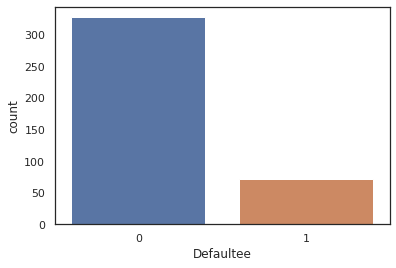

In [ ]:
sns.countplot(df.Defaultee)
print ('Defaultee Percentages are\n',df.Defaultee.value_counts() / df.Defaultee.count())

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Student'] = df['Student'].map({'Yes': 1, 'No': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Ethnicity'] = df['Ethnicity'].map({'Caucasian': 1, 'Asian': 0,'African American':2})

In [ ]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,14.891,3606,283,2,34,11,1,0,1,1,333,0
1,106.025,6645,483,3,82,15,0,1,1,0,903,0
2,104.593,7075,514,4,71,11,1,0,0,0,580,0
3,148.924,9504,681,3,36,11,0,0,0,0,964,0
4,55.882,4897,357,2,68,16,1,0,1,1,331,0


In [ ]:
df.isnull().sum().sum()
#mean_value=df['Column_name'].mean()
#df['Column_name'].fillna(value=mean_value, inplace=True)

0

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
X = df.drop(columns = ['Defaultee'])
y = df['Defaultee'].values

In [ ]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [ ]:
X

array([[-0.86158299, -0.48999879, -0.46553881, ...,  0.79539491,
         0.01058078, -0.40727698],
       [ 1.72743711,  0.82826106,  0.82870309, ...,  0.79539491,
        -1.40018942,  0.83405596],
       [ 1.68675551,  1.01478681,  1.02931059, ..., -1.25723711,
        -1.40018942,  0.13063396],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285, ...,  0.79539491,
         0.01058078, -0.83194351],
       [-0.21280808, -0.95891584, -1.05441888, ...,  0.79539491,
         0.01058078, -1.13247675],
       [-0.75334493,  0.34199278,  0.38866085, ..., -1.25723711,
        -1.40018942,  0.97125591]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 11), (80, 11), (320,), (80,))

In [ ]:
model = LogisticRegression()#KNeighborsClassifier()#SVC#RandomForestClassifier()#AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('Train score is', score)
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Train score is 1.0
--
Precision score is  1.0
--
ROC Score is 1.0
--
Recall Score is  1.0
--
Confusion Matrix

 [[68  0]
 [ 0 12]]


# Additional Tasks

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
score = cross_val_score(model, X_train, y_train, cv = 6)

In [ ]:
#HoldOut Validation Approach- Train And Test Split
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)
#K Fold Cross Validation
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

0.7700496806245565
[0.77730496 0.76028369 0.75319149 0.78409091 0.765625   0.74715909
 0.76420455 0.74289773 0.78693182 0.78125   ]
0.7662939232753063


In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.7644485128072779


In [ ]:
scores

array([0.76933996, 0.76295245, 0.75017743, 0.765625  , 0.77414773])

In [ ]:
from sklearn.model_selection import ShuffleSplit
model=DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)

In [ ]:
results

array([0.7624231 , 0.7780407 , 0.78513961, 0.78561287, 0.77330809,
       0.76762896, 0.77614766, 0.75863701, 0.77330809, 0.77236157])

In [ ]:
np.mean(results)

0.773260766682442